# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [23]:
# Import the libraries you'll need here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats



# Load the csv file into a pandas dataframe.


In [24]:
# Load the csv file into a pandas dataframe.

carsDataFrame = pd.read_csv('cars.csv')



# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [25]:
# 1. Print the number of duplicate rows we have in our dataframe.

#720 dupliactes

duplicateCounter = 0
for row in carsDataFrame.duplicated():
    
    if(row == True):
        duplicateCounter += 1
        
print(duplicateCounter)
    



720


In [26]:
#  2. Modify our df to have all duplicate rows removed. 

carsDataFrame.drop_duplicates(inplace = True)


In [27]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

duplicateCounter = 0
for row in carsDataFrame.duplicated():
    
    if(row == True):
        duplicateCounter += 1
        
print(duplicateCounter)

0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [32]:
# * Which column has the most null values and how many null values does it have?

#'zengine HP' : 69

print(carsDataFrame.isnull().sum())



Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64


In [63]:
# * Print how long (aka how many rows) our dataframe is.
#11194

print(len(carsDataFrame))


11092


In [36]:
# * Remove any row that has a null value in it. 

carsDataFrame.dropna(inplace = True)



In [65]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

#11092

print(len(carsDataFrame))

11092


### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

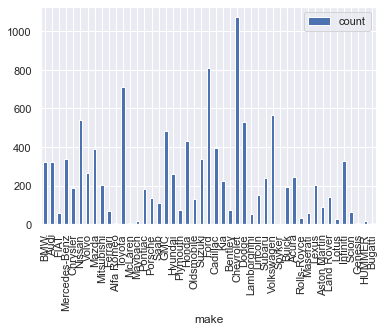

In [102]:
# Make a bar chart that displays how many times each brand of car appears in this data. 


#creating dataFrame to plot
makeCounter_dict ={'make':[], 'count':[]}

for make in carsDataFrame['Make'].unique():
    makeCounter_dict['make'].append(make)
    makeCounter_dict['count'].append(carsDataFrame['Make'].values.tolist().count(make))

makeCounter_df = pd.DataFrame(makeCounter_dict)


#plotting and displaying data frame

makeCounter_df.plot(x ='make', y='count', kind = 'bar')

plt.show()

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

<function matplotlib.pyplot.show(close=None, block=None)>

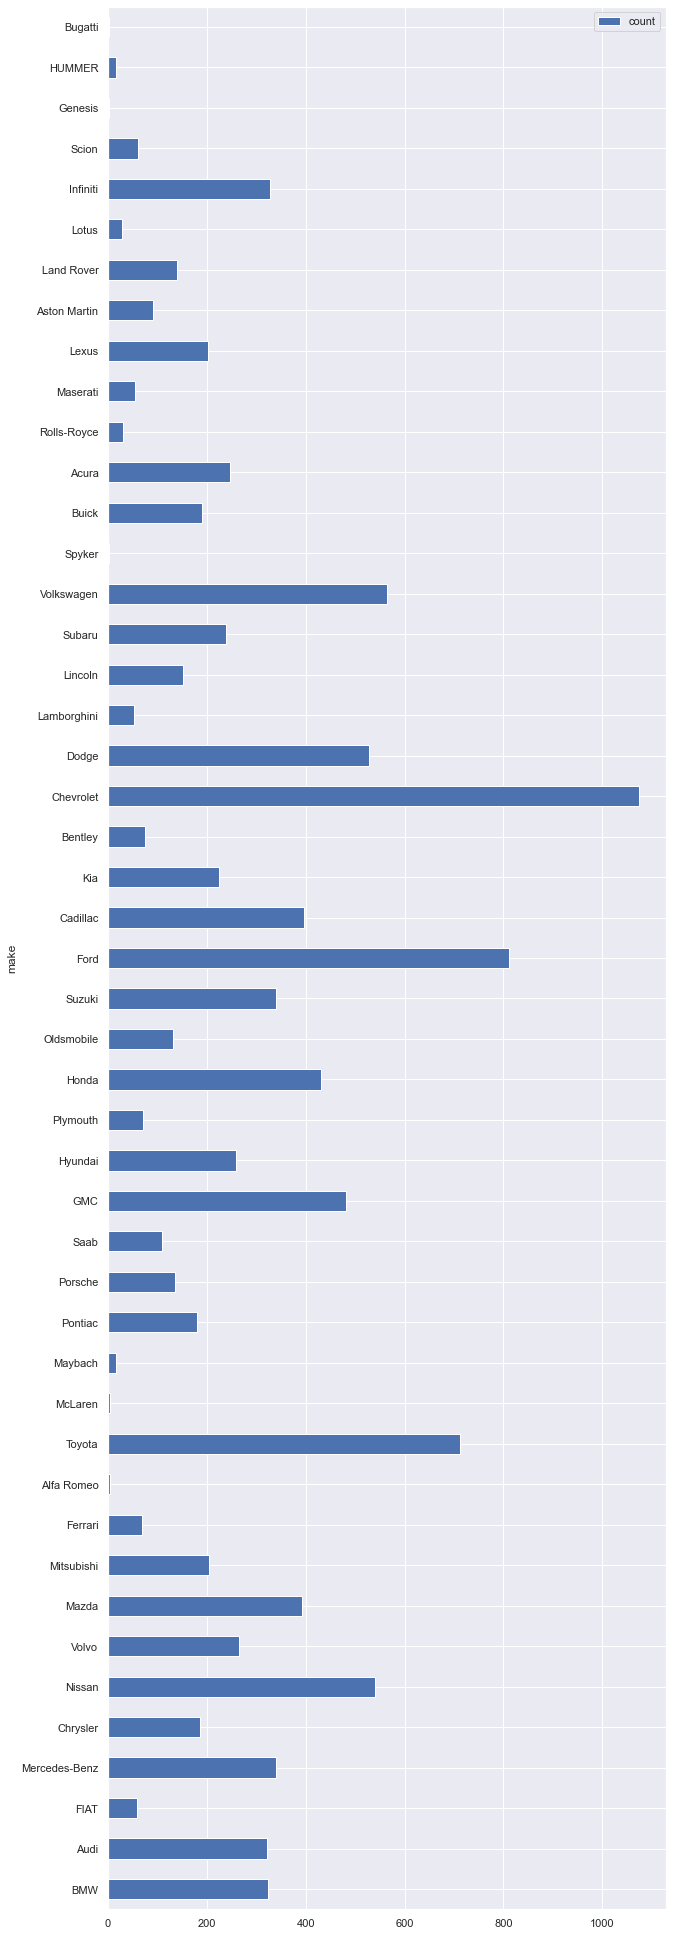

In [122]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

makeCounter_df.plot.barh(x ='make', y='count',figsize=(10,35))

plt.show


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


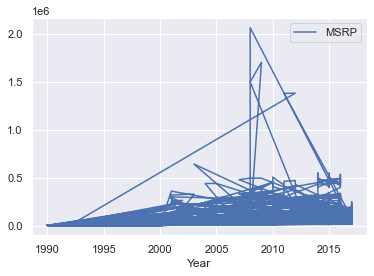

In [121]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

carsDataFrame.plot.line(x ='Year', y='MSRP')

plt.show()


# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [152]:
# Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.

adjustedPrice_list = []

for index, row in carsDataFrame.iterrows():
    
    if (row['Year'] > 2000):
        
        adjustedPrice_list.append(row['MSRP'])
        
    else:
        
        adjustedPrice_list.append(row['MSRP'] * 10)
        
        
carsDataFrame['adjusted_price'] = adjustedPrice_list


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000



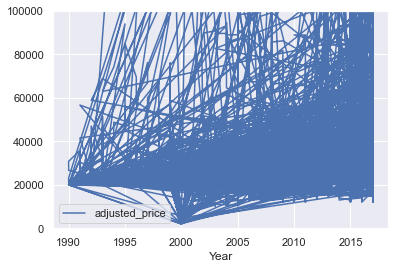

In [151]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

carsDataFrame.plot.line(x ='Year', y ='adjusted_price')
plt.ylim(bottom = 0, top = 100000)  

plt.show()



# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [34]:
# What are the top 5 car makers make the most expensive cars on average. 





# What are the top 5 car makers that have the highest median highway MPG?

In [35]:
# Which car makers have the highest median highway MPG?




# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

In [36]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.




# Remake the same histogram, but limit the x-axis from 0 to 100,000

In [37]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000




# Plot the relationship between Engine HP and highway MPG

In [38]:
# Plot the relationship between Engine HP and highway MPG




# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

In [23]:
# Remove any statisical outliers from Engine HP and highway MPG




# What does this plot tell you about how Engine HP affects highway MPG?

In [26]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('YOUR ANSWER HERE')

YOUR ANSWER HERE


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

In [27]:
# Using a pairplot, display all of the linear relationship.




In [28]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('YOUR ANSWER HERE')



YOUR ANSWER HERE


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

In [29]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8



# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well


